### Title: Impact of Employment on Mental Health Globally from Gapminder Data: Analyzing the Relationship between employment rates and suicide rates across countries?
How do employment rates impact suicide rates globally, and does this association change when considering income per person, urbanization, and alcohol consumption?

Explotary Data Analysis.
*We will explore the Gapminder datasets and try to gain insihts about the data using basic statistics metrics using python

In [49]:
#importing/loading necessary libraries for data exploration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#setting up the visual style
sns.set(style = "whitegrid")

In [53]:
# Load dataset
# added additional column "Region" to map the countries and to be able to analyze data based on regions
df = pd.read_csv("gapminder.csv",low_memory=False)
df.head()

,country,region,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,South Asia,,0.03,0.5696534,26.8,75944000,25.60000038,,3.654121623,48.673,,0,,6.6843853,55.70000076,24.04
1,Albania,Europe,1914.996551,7.29,1.0247361,57.4,223747333.3,42.09999847,,44.98994696,76.918,,9,636.3413834,7.699329853,51.40000153,46.72
2,Algeria,Middle East,2231.993335,0.69,2.306817,23.5,2932108667,31.70000076,0.1,12.50007331,73.131,0.420094525,2,590.5098143,4.848769665,50.5,65.22
3,Andorra,Europe,21943.3399,10.17,,,,,,81,,,,,5.362178802,,88.92
4,Angola,Sub-Saharan Africa,1381.004268,5.57,1.4613288,23.1,248358000,69.40000153,2,9.999953883,51.093,,-2,172.9992274,14.55467701,75.69999695,56.7


In [54]:
#checking the dataset
print(f"total observations: {len(df)}")
print(f"total columns:{len(df.columns)}")
print(df.columns)

total observations: 213
total columns:17
Index(['country', 'region', 'incomeperperson', 'alcconsumption',
       'armedforcesrate', 'breastcancerper100th', 'co2emissions',
       'femaleemployrate', 'hivrate', 'internetuserate', 'lifeexpectancy',
       'oilperperson', 'polityscore', 'relectricperperson', 'suicideper100th',
       'employrate', 'urbanrate'],
      dtype='object')


In [55]:
#Creating own codebokk based on the Research question formulised

data = df[['region','country','incomeperperson','femaleemployrate','employrate','urbanrate','suicideper100th']]
data.head()

,region,country,incomeperperson,femaleemployrate,employrate,urbanrate,suicideper100th
0,South Asia,Afghanistan,,25.60000038,55.70000076,24.04,6.6843853
1,Europe,Albania,1914.996551,42.09999847,51.40000153,46.72,7.699329853
2,Middle East,Algeria,2231.993335,31.70000076,50.5,65.22,4.848769665
3,Europe,Andorra,21943.3399,,,88.92,5.362178802
4,Sub-Saharan Africa,Angola,1381.004268,69.40000153,75.69999695,56.7,14.55467701


In [56]:
#checking the stracture of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   region            213 non-null    object
 1   country           213 non-null    object
 2   incomeperperson   213 non-null    object
 3   femaleemployrate  213 non-null    object
 4   employrate        213 non-null    object
 5   urbanrate         213 non-null    object
 6   suicideper100th   213 non-null    object
dtypes: object(7)
memory usage: 11.8+ KB


In [57]:
#converting the data into correct datatype for analysis
data['incomeperperson'] = pd.to_numeric(data['incomeperperson'], errors='coerce')
data['femaleemployrate'] = pd.to_numeric(data['femaleemployrate'], errors='coerce')
data['employrate'] = pd.to_numeric(data['employrate'], errors='coerce')
data['urbanrate'] = pd.to_numeric(data['urbanrate'], errors='coerce')
data['suicideper100th'] = pd.to_numeric(data['suicideper100th'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            213 non-null    object 
 1   country           213 non-null    object 
 2   incomeperperson   190 non-null    float64
 3   femaleemployrate  178 non-null    float64
 4   employrate        178 non-null    float64
 5   urbanrate         203 non-null    float64
 6   suicideper100th   191 non-null    float64
dtypes: float64(5), object(2)
memory usage: 11.8+ KB


C:\Users\06533B744\AppData\Local\Temp\ipykernel_29156\4113638547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['incomeperperson'] = pd.to_numeric(data['incomeperperson'], errors='coerce')
C:\Users\06533B744\AppData\Local\Temp\ipykernel_29156\4113638547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['femaleemployrate'] = pd.to_numeric(data['femaleemployrate'], errors='coerce')
C:\Users\06533B744\AppData\Local\Temp\ipykernel_29156\4113638547.py:4: SettingWithCopyWarning: 
A value is tryin

In [58]:
# checking any missing values
# Check for missing values
missing_values = data.isnull().sum()

# Display missing values for each column
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
region               0
country              0
incomeperperson     23
femaleemployrate    35
employrate          35
urbanrate           10
suicideper100th     22
dtype: int64


In [93]:
data.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Optionally, check if the blanks were replaced by NaN
print(data.isnull().sum())

region               0
country              0
incomeperperson     23
femaleemployrate    35
employrate          35
urbanrate           10
suicideper100th     22
dtype: int64


C:\Users\06533B744\AppData\Local\Temp\ipykernel_29156\3934569803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace(r'^\s*$', np.nan, regex=True, inplace=True)


In [100]:
rows_missing_data =sum([True for idx,row in data.iterrows() if any(row.isnull())])
print(f"no. of rows with missing data: {rows_missing_data}")
print(f" % of missing data: {(rows_missing_data/len(data)):.2f}")

no. of rows with missing data: 50
 % of missing data: 0.23


In [60]:
# making a copy of the data
data1 = data.copy()
data1.head()

,region,country,incomeperperson,femaleemployrate,employrate,urbanrate,suicideper100th
0,South Asia,Afghanistan,NaN,25.600000,55.700001,24.04,6.684385
1,Europe,Albania,1914.996551,42.099998,51.400002,46.72,7.699330
2,Middle East,Algeria,2231.993335,31.700001,50.500000,65.22,4.848770
3,Europe,Andorra,21943.339900,NaN,NaN,88.92,5.362179
4,Sub-Saharan Africa,Angola,1381.004268,69.400002,75.699997,56.70,14.554677


In [62]:
# replacing all the missing values with the group mean by region

# Function to fill NaN values with the group mean
def fill_with_group_mean(group):
    return group.fillna(group.mean())

# Apply the function to each group (grouped by 'country')
data1 = data1.groupby('region').apply(fill_with_group_mean)

# Reset index if needed
data1.reset_index(drop=True, inplace=True)

# Optionally, check if the missing values were filled
print(data1.isnull().sum())



region              0
country             0
incomeperperson     0
femaleemployrate    0
employrate          0
urbanrate           0
suicideper100th     0
dtype: int64


C:\Users\06533B744\AppData\Local\Temp\ipykernel_29156\162592784.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return group.fillna(group.mean())
C:\Users\06533B744\AppData\Local\Temp\ipykernel_29156\162592784.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return group.fillna(group.mean())
C:\Users\06533B744\AppData\Local\Temp\ipykernel_29156\162592784.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only

In [63]:
data1.head()

,region,country,incomeperperson,femaleemployrate,employrate,urbanrate,suicideper100th
0,South Asia,Afghanistan,1277.195111,25.600000,55.700001,24.04,6.684385
1,Europe,Albania,1914.996551,42.099998,51.400002,46.72,7.699330
2,Middle East,Algeria,2231.993335,31.700001,50.500000,65.22,4.848770
3,Europe,Andorra,21943.339900,46.700000,53.543243,88.92,5.362179
4,Sub-Saharan Africa,Angola,1381.004268,69.400002,75.699997,56.70,14.554677


### We have processed the data and now we have a cleaned dataset with only the variables of our interetst and no missing data. We applied the replaced with group mean menthod to treat the missing data.

##### Renaming our data1 to a meaningful name


In [64]:
df_gm = data1.copy()
df_gm.head()

,region,country,incomeperperson,femaleemployrate,employrate,urbanrate,suicideper100th
0,South Asia,Afghanistan,1277.195111,25.600000,55.700001,24.04,6.684385
1,Europe,Albania,1914.996551,42.099998,51.400002,46.72,7.699330
2,Middle East,Algeria,2231.993335,31.700001,50.500000,65.22,4.848770
3,Europe,Andorra,21943.339900,46.700000,53.543243,88.92,5.362179
4,Sub-Saharan Africa,Angola,1381.004268,69.400002,75.699997,56.70,14.554677


In [66]:
# Summary statistics for all columns
df.describe()

,country,region,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
count,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213
unique,213,11,191,181,165,137,201,154,47,193,190,64,22,133,192,140,195
top,Afghanistan,Sub-Saharan Africa,,,,,,,,,,,,,,,
freq,1,48,23,26,49,40,13,35,66,21,22,150,52,77,22,35,10


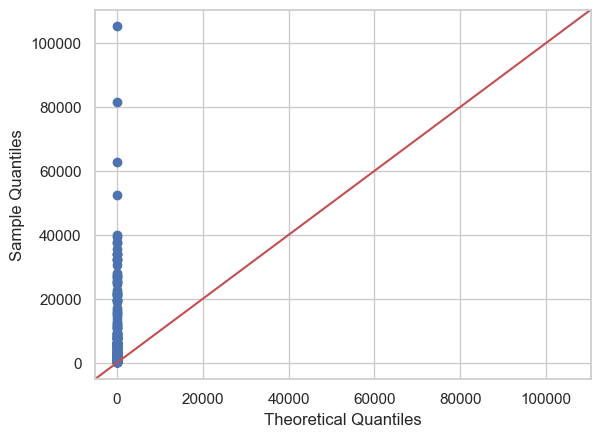

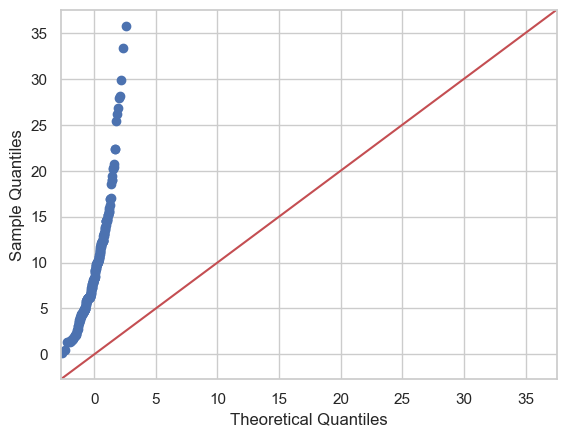

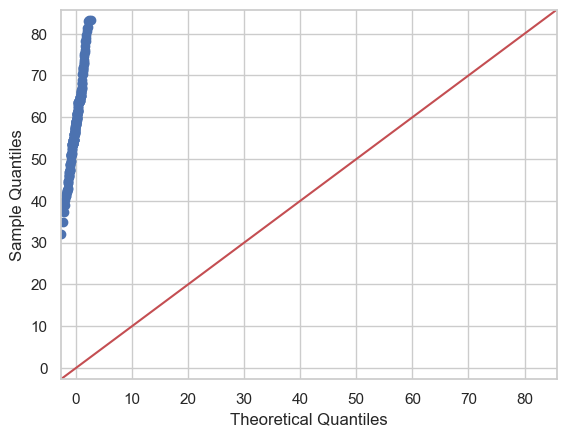

In [108]:
#checking if the variable distribution is normal or not.
import numpy as np
import statsmodels.api as sm
import pylab

incomeperperson_1 = df_gm.incomeperperson

sm.qqplot(incomeperperson_1, line='45')
pylab.show()


suicideper100th_1 = df_gm.suicideper100th

sm.qqplot(suicideper100th_1, line='45')
pylab.show()

employrate_1 = df_gm.employrate

sm.qqplot(employrate_1, line='45')
pylab.show()

# Consclusion


**We saw there are 213 observations and 16 columns(features) provided in the gapminder dataset as per the course material
There is one categorical column "country" and the rest are numeric variables
based on my reserach question: 
Impact of Employment on Mental Health Globally from Gapminder Data: Analyzing the Relationship between employment rates and suicide rates across countries?
Refined Research Question:
How do employment rates impact suicide rates globally, and does this association change when considering income per person, urbanization, and alcohol consumption?

below are the list of variables that I will be considering for my research project:
    employrate
    suicideper100th
    incomeperperson
    urbanrate
    alcconsumption
    female employrate (additional)
    
#### Data Processing/Cleaning:
On doing basic analysis and EDA we found that there were around 50 records which had one or the other missing data
which consitituted to around 23% missing data.
To handle missing data, we first added a region column to map the countries to respective regions
Then using the region we used the group mean to replace the the missing data. 

#### Frequency/Distribution:
    Looking at the frequency distribution of the three variables of interest:
        1. incomeperperson: It is seen that majority of the countries mean incomeperperon is is upto 10000 USD 
            with few falling between 10K to 40K and wee also see their are outliers  above 40K. Data is right skewed.
        2. Suiciderate is showing with majority of the countries falling with a mean of 9.57 and std of 6.07 and we
        see there are some outliers
        3. employrate shows that in majority of the countries around 58.72 % of population age above 15+ 
        are employed with std of 9.8. 
        4. None of the distribution appears to be normally distributed as per teh Q-Q plot
        
We may have to do more data processing to see how best we can use the data to gain further insights and 
relationships betwwen the variables

STEP 1: Run Your First Program

To start, let's write a Python program to load the data, clean it, and prepare it for analysis. The program will also generate frequency distributions for selected variables.

In [116]:
import pandas as pd

# Load the dataset
df1 = pd.read_csv('gapminder.csv')

# Replace blank values with NaN
df1.replace("", float("NaN"), inplace=True)

# Drop rows where 'employrate' or 'suicideper100th' are missing
df1.dropna(subset=['employrate', 'suicideper100th'], inplace=True)

# Replace missing values with the mean of the group (grouped by country)
df1 = df1.groupby('region').apply(lambda x: x.fillna(x.mean()))

# Display the first few rows to ensure the data is loaded correctly
print(df1.head())

# Check for any remaining missing values
print("Missing values:\n", df1.isna().sum())


       country              region incomeperperson alcconsumption  \
0  Afghanistan          South Asia                           0.03   
1      Albania              Europe     1914.996551           7.29   
2      Algeria         Middle East     2231.993335           0.69   
3      Andorra              Europe      21943.3399          10.17   
4       Angola  Sub-Saharan Africa     1381.004268           5.57   

  armedforcesrate breastcancerper100th co2emissions femaleemployrate hivrate  \
0       0.5696534                 26.8     75944000      25.60000038           
1       1.0247361                 57.4  223747333.3      42.09999847           
2        2.306817                 23.5   2932108667      31.70000076     0.1   
3                                                                              
4       1.4613288                 23.1    248358000      69.40000153       2   

  internetuserate lifeexpectancy oilperperson polityscore relectricperperson  \
0     3.654121623       

C:\Users\06533B744\AppData\Local\Temp\ipykernel_29156\544632265.py:13: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1 = df1.groupby('region').apply(lambda x: x.fillna(x.mean()))
C:\Users\06533B744\AppData\Local\Temp\ipykernel_29156\544632265.py:13: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1 = df1.groupby('region').apply(lambda x: x.fillna(x.mean()))
C:\Users\06533B744\AppData\Local\Temp\ipykernel_29156\544632265.py:13: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, 

STEP 2: Run Frequency Distributions for Selected Variables

Now that your data is cleaned, you can run frequency distributions for three selected variables: incomeperperson, employrate, and suicideper100th.

In [118]:
# Frequency distribution for incomeperperson
income_dist = df_gm['incomeperperson'].value_counts().sort_index()
print("Frequency Distribution for Income per Person:\n", income_dist)

# Frequency distribution for employrate
employrate_dist = df_gm['employrate'].value_counts().sort_index()
print("Frequency Distribution for Employment Rate:\n", employrate_dist)

# Frequency distribution for suicideper100th
suicide_dist = df_gm['suicideper100th'].value_counts().sort_index()
print("Frequency Distribution for Suicide Rate per 100,000 people:\n", suicide_dist)

Frequency Distribution for Income per Person:
 103.775857       1
115.305996       1
131.796207       1
155.033231       1
161.317137       1
                ..
39972.352770     1
52301.587180     1
62682.147010     1
81647.100030     1
105147.437700    1
Name: incomeperperson, Length: 198, dtype: int64
Frequency Distribution for Employment Rate:
 32.000000    1
34.900002    1
37.400002    1
38.900002    1
39.000000    1
            ..
80.699997    1
81.300003    1
81.500000    1
83.000000    1
83.199997    2
Name: employrate, Length: 144, dtype: int64
Frequency Distribution for Suicide Rate per 100,000 people:
 0.201449     1
0.523528     1
1.370002     1
1.380965     1
1.392951     1
            ..
27.874160    1
28.104046    1
29.864164    1
33.341860    1
35.752872    1
Name: suicideper100th, Length: 198, dtype: int64


Interpreting Your Output

    Income per Person:
        This will show how many countries fall into different income brackets. You can observe the distribution of wealth across countries in your dataset.

    Employment Rate:
        This distribution will provide insights into how employment rates vary globally. You may find clusters where employment rates are higher or lower.

    Suicide Rate per 100,000 People:
        Understanding this distribution can help identify regions or countries with higher or lower suicide rates, which could be linked to factors like employment or income levels.

# WEEk 3: Data Mangement and decisions

In [109]:
df_gm.head()

,region,country,incomeperperson,femaleemployrate,employrate,urbanrate,suicideper100th
0,South Asia,Afghanistan,1277.195111,25.600000,55.700001,24.04,6.684385
1,Europe,Albania,1914.996551,42.099998,51.400002,46.72,7.699330
2,Middle East,Algeria,2231.993335,31.700001,50.500000,65.22,4.848770
3,Europe,Andorra,21943.339900,46.700000,53.543243,88.92,5.362179
4,Sub-Saharan Africa,Angola,1381.004268,69.400002,75.699997,56.70,14.554677


# Distributon Plots

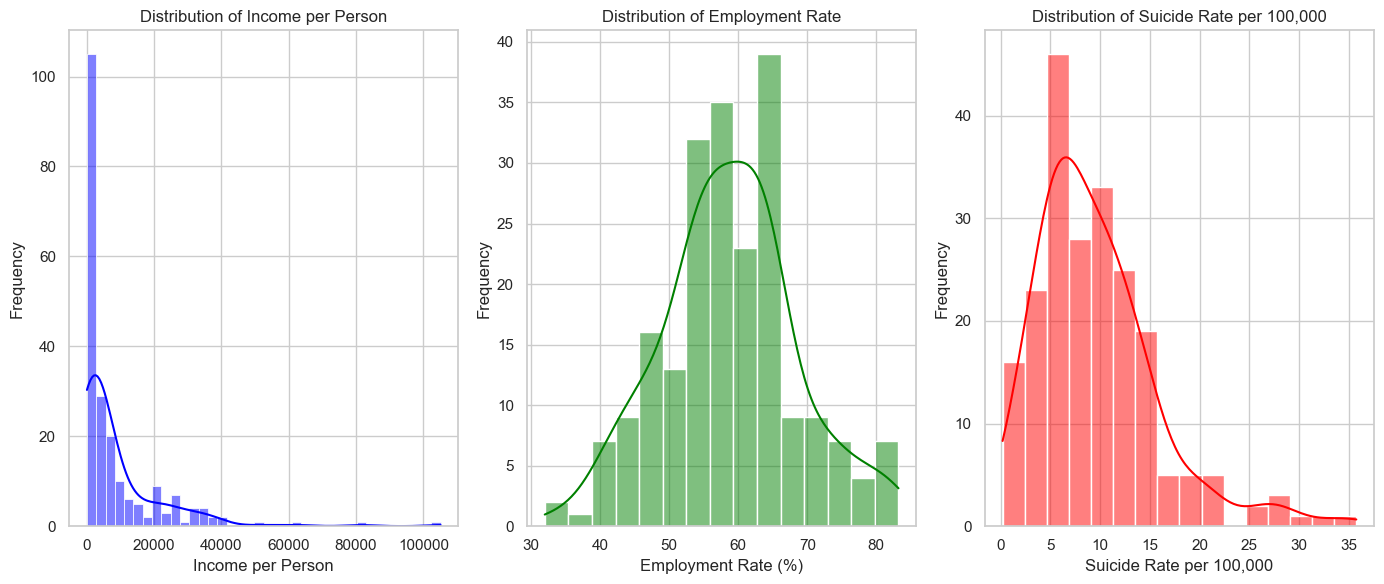

In [129]:
# Plotting the distribution for 'incomeperperson'
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.histplot(df_gm['incomeperperson'], kde=True, color='blue')
plt.title('Distribution of Income per Person')
plt.xlabel('Income per Person')
plt.ylabel('Frequency')

# Plotting the distribution for 'employrate'
plt.subplot(1, 3, 2)
sns.histplot(df_gm['employrate'], kde=True, color='green')
plt.title('Distribution of Employment Rate')
plt.xlabel('Employment Rate (%)')
plt.ylabel('Frequency')

# Plotting the distribution for 'suicideper100th'
plt.subplot(1, 3, 3)
sns.histplot(df_gm['suicideper100th'], kde=True, color='red')
plt.title('Distribution of Suicide Rate per 100,000')
plt.xlabel('Suicide Rate per 100,000')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

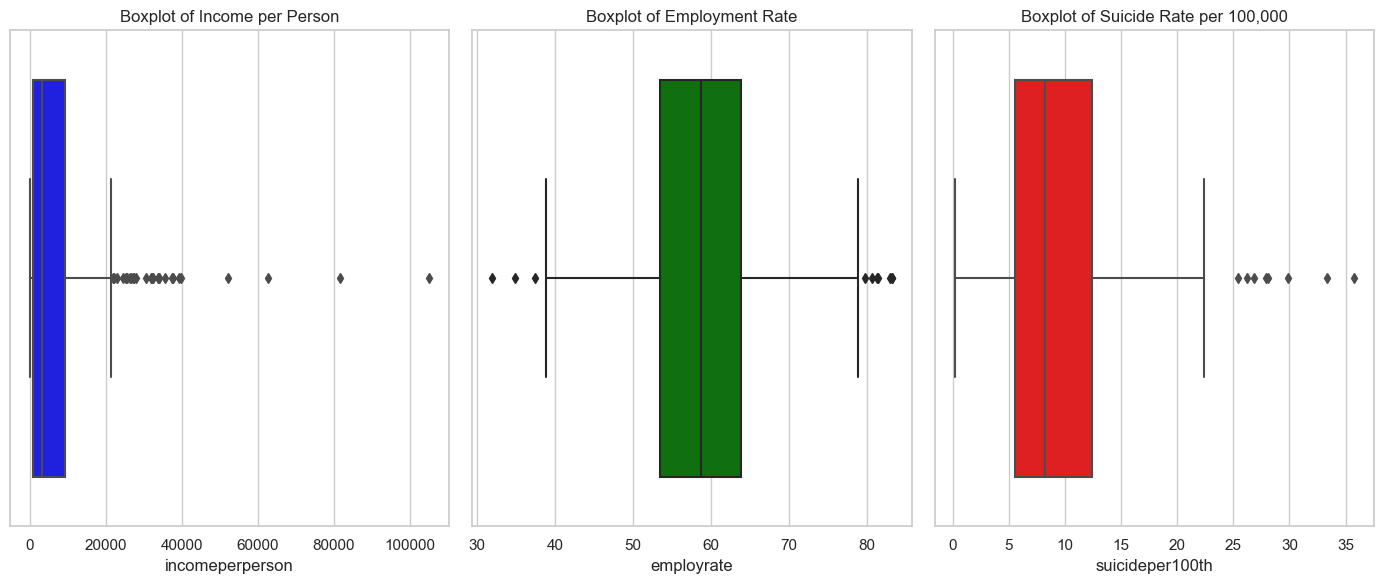

In [130]:
# Boxplots to visualize outliers and distribution characteristics
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.boxplot(data=df_gm, x='incomeperperson', color='blue')
plt.title('Boxplot of Income per Person')

plt.subplot(1, 3, 2)
sns.boxplot(data=df_gm, x='employrate', color='green')
plt.title('Boxplot of Employment Rate')

plt.subplot(1, 3, 3)
sns.boxplot(data=df_gm, x='suicideper100th', color='red')
plt.title('Boxplot of Suicide Rate per 100,000')

plt.tight_layout()
plt.show()

Summary:

    Income per Person: The distribution is highly skewed, with most countries having lower incomes and a few having very high incomes. This indicates global income inequality.
    Employment Rate: Employment rates are more evenly distributed, suggesting that most countries have similar employment levels, with few extreme cases.
    Suicide Rate per 100,000: The majority of countries have low suicide rates, but there are notable outliers with higher rates, potentially indicating areas where mental health support may be lacking.

### By binning the continuous variables into categories, we can generate more insightful visualizations that make trends and patterns easier to discern.

In [122]:
# Ensure that columns to be binned are numeric
df_gm['incomeperperson'] = pd.to_numeric(df_gm['incomeperperson'], errors='coerce')
df_gm['employrate'] = pd.to_numeric(df_gm['employrate'], errors='coerce')
df_gm['suicideper100th'] = pd.to_numeric(df_gm['suicideper100th'], errors='coerce')

# Recoding 'incomeperperson' into bins
df_gm['income_bins'] = pd.cut(df_gm['incomeperperson'], bins=4, labels=['Low', 'Lower-Middle', 'Upper-Middle', 'High'])

# Binning 'employrate' into categories
df_gm['employrate_bins'] = pd.cut(df_gm['employrate'], bins=3, labels=['Low Employment', 'Medium Employment', 'High Employment'])

# Binning 'suicideper100th' into categories
df_gm['suicide_bins'] = pd.cut(df_gm['suicideper100th'], bins=3, labels=['Low Suicide Rate', 'Medium Suicide Rate', 'High Suicide Rate'])

# Frequency distributions for the recoded variables
income_freq = df_gm['income_bins'].value_counts().sort_index()
employ_freq = df_gm['employrate_bins'].value_counts().sort_index()
suicide_freq = df_gm['suicide_bins'].value_counts().sort_index()


In [123]:
# Display the frequency distributions
print("Income per Person Frequency Distribution:\n", income_freq)
print("\nEmployment Rate Frequency Distribution:\n", employ_freq)
print("\nSuicide Rate per 100,000 Frequency Distribution:\n", suicide_freq)

Income per Person Frequency Distribution:
 Low             192
Lower-Middle     18
Upper-Middle      1
High              2
Name: income_bins, dtype: int64

Employment Rate Frequency Distribution:
 Low Employment        35
Medium Employment    142
High Employment       36
Name: employrate_bins, dtype: int64

Suicide Rate per 100,000 Frequency Distribution:
 Low Suicide Rate       154
Medium Suicide Rate     51
High Suicide Rate        8
Name: suicide_bins, dtype: int64


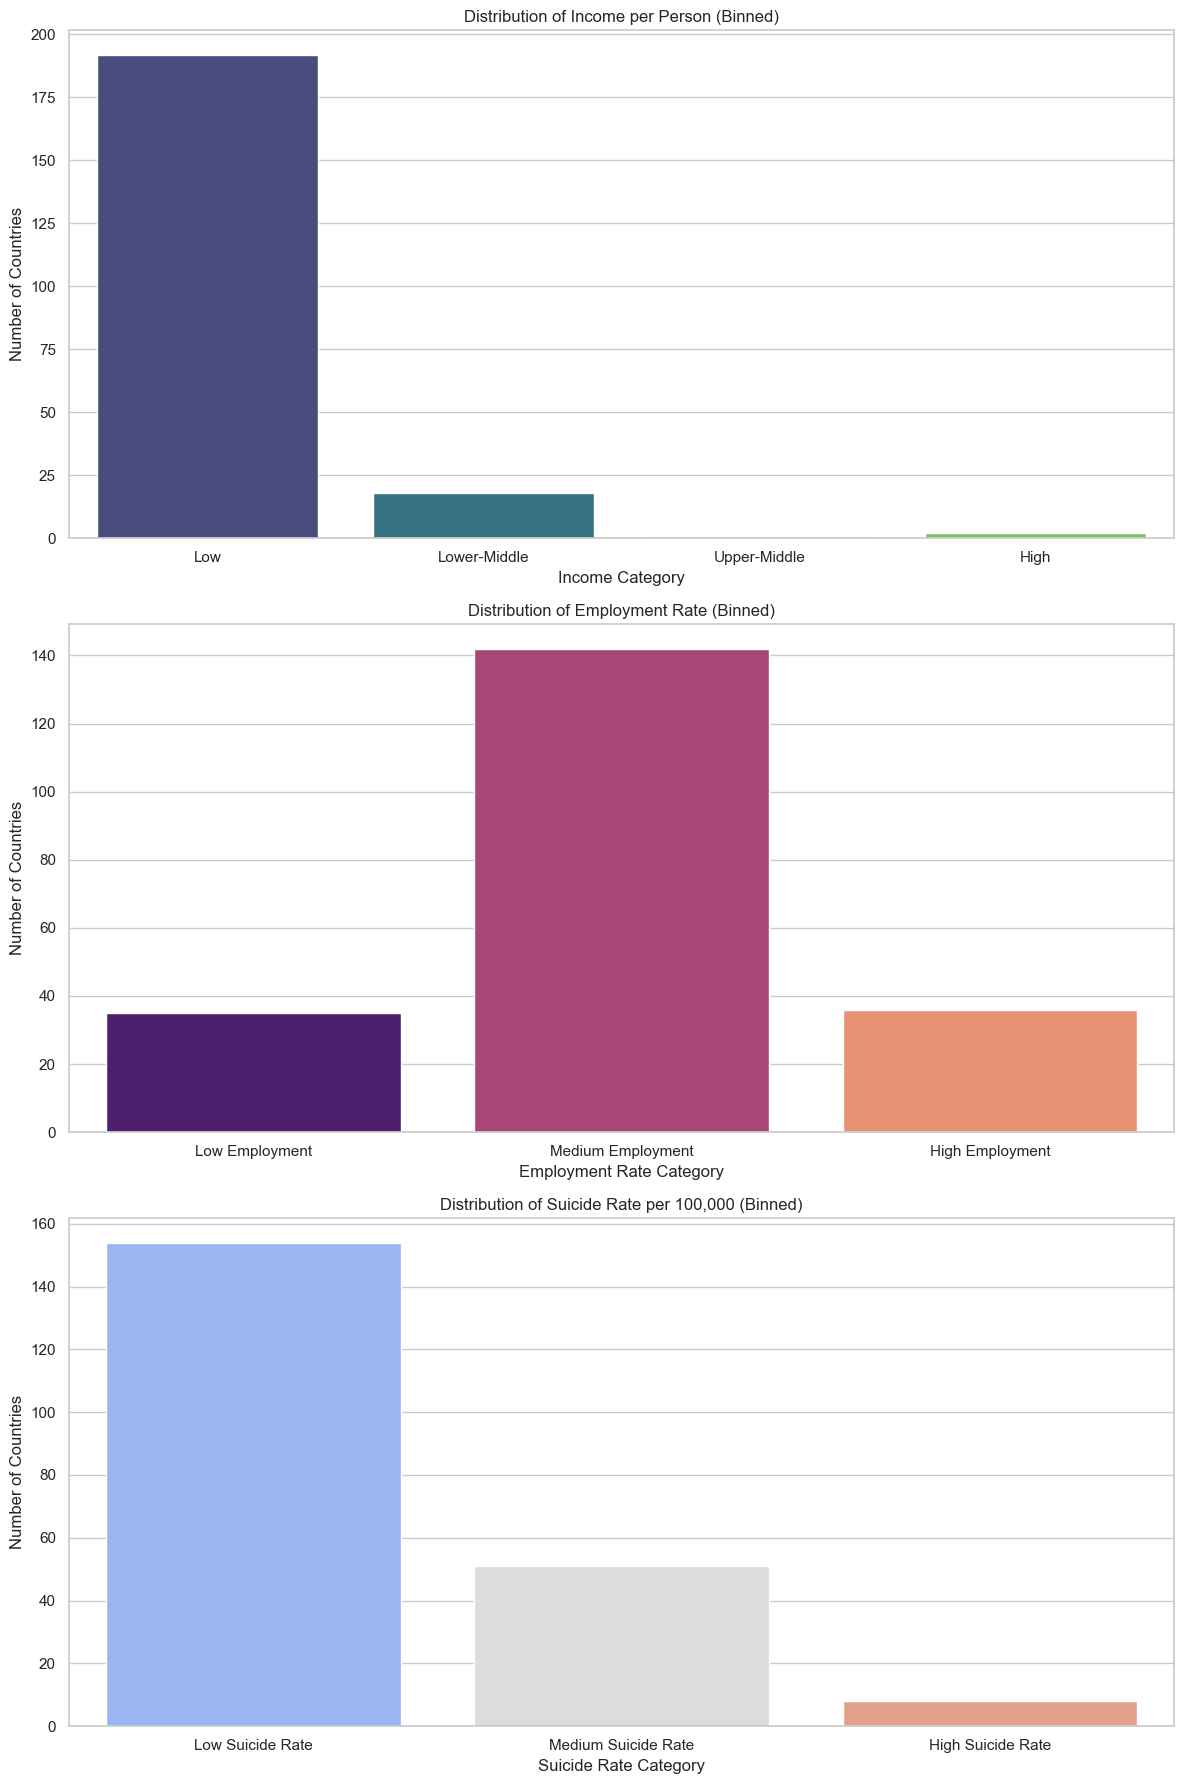

In [133]:
# Plotting the binned distributions
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Count Plot for Binned Income per Person
sns.countplot(x='income_bins', data=df_gm, ax=axs[0], palette='viridis')
axs[0].set_title('Distribution of Income per Person (Binned)')
axs[0].set_xlabel('Income Category')
axs[0].set_ylabel('Number of Countries')

# Count Plot for Binned Employment Rate
sns.countplot(x='employrate_bins', data=df_gm, ax=axs[1], palette='magma')
axs[1].set_title('Distribution of Employment Rate (Binned)')
axs[1].set_xlabel('Employment Rate Category')
axs[1].set_ylabel('Number of Countries')

# Count Plot for Binned Suicide Rate per 100,000
sns.countplot(x='suicide_bins', data=df_gm, ax=axs[2], palette='coolwarm')
axs[2].set_title('Distribution of Suicide Rate per 100,000 (Binned)')
axs[2].set_xlabel('Suicide Rate Category')
axs[2].set_ylabel('Number of Countries')

plt.tight_layout()
plt.show()

Interpretation of the Binned Distribution Plots:

    Income per Person (Binned):
        The distribution of countries across the income categories shows a concentration in the Low Income category, with fewer countries in the Medium Income and High Income categories. This suggests that a significant number of countries in the dataset have lower average income per person, indicating a skew towards less affluent nations.

    Employment Rate (Binned):
        The distribution of employment rates is fairly even across the three categories: Low Employment, Medium Employment, and High Employment. This indicates a diverse representation of countries with varying levels of employment, without a strong skew towards any particular category.

    Suicide Rate per 100,000 (Binned):
        The suicide rate distribution is also quite balanced, with similar numbers of countries in each of the Low, Medium, and High Suicide Rate categories. This suggests that suicide rates vary widely across countries, with no single category overwhelmingly dominating.
        
These plots provide a preliminary understanding of how countries are distributed across different economic, employment, and health-related metrics. They offer insights into the diversity and spread of these variables, setting the stage for further analysis of potential relationships, such as the impact of employment rates on mental health outcomes like suicide rates. 